In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


In [45]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [46]:
df

,ID,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,9580,0.668999,58,2,0.449504,3425.0,9,1,1,1,1.0,0
1,39755,0.015922,71,0,6.000000,NaN,5,0,0,0,0.0,0
2,118799,0.183062,52,1,0.035593,5000.0,9,0,0,0,0.0,0
3,16489,0.162301,77,0,0.227886,2000.0,8,0,0,0,0.0,0
4,149857,0.404199,30,0,0.026010,5843.0,4,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
104995,79500,0.842886,33,0,0.182561,9300.0,10,0,0,0,1.0,0
104996,84928,0.805186,68,0,0.229466,5429.0,7,0,0,0,0.0,0
104997,56301,0.811494,51,2,3.709314,3016.0,26,0,4,0,0.0,1
104998,41912,0.412590,62,1,0.173290,14166.0,7,1,1,0,0.0,0


## EDA

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 20 columns):
 #   Column                                Non-Null Count   Dtype   
---  ------                                --------------   -----   
 0   ID                                    105000 non-null  int64   
 1   RevolvingUtilizationOfUnsecuredLines  105000 non-null  float64 
 2   Age                                   105000 non-null  int64   
 3   NumberOfTime30-59DaysPastDueNotWorse  105000 non-null  int64   
 4   DebtRatio                             105000 non-null  float64 
 5   MonthlyIncome                         105000 non-null  float64 
 6   NumberOfOpenCreditLinesAndLoans       105000 non-null  int64   
 7   NumberOfTimes90DaysLate               105000 non-null  int64   
 8   NumberRealEstateLoansOrLines          105000 non-null  int64   
 9   NumberOfTime60-89DaysPastDueNotWorse  105000 non-null  int64   
 10  NumberOfDependents                    105000 non-null  f

In [48]:
df.describe()

,ID,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
count,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,8.416400e+04,105000.000000,105000.000000,105000.000000,105000.000000,102236.000000,105000.000000
mean,75006.458152,5.378324,52.325610,0.409352,352.044192,6.703641e+03,8.459952,0.254619,1.019010,0.228762,0.757933,0.066514
std,43315.742022,201.573457,14.766425,4.056717,1820.229318,1.622288e+04,5.134329,4.032506,1.131065,4.017864,1.115273,0.249180
min,1.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37590.750000,0.029974,41.000000,0.000000,0.174950,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,74941.500000,0.154252,52.000000,0.000000,0.366061,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,112542.500000,0.556035,63.000000,0.000000,0.870083,8.250000e+03,11.000000,0.000000,2.000000,0.000000,1.000000,0.000000
max,149999.000000,29110.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000,1.000000


Valores nulos por columna:
ID                                          0
RevolvingUtilizationOfUnsecuredLines        0
Age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           20836
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2764
SeriousDlqin2yrs                            0
dtype: int64


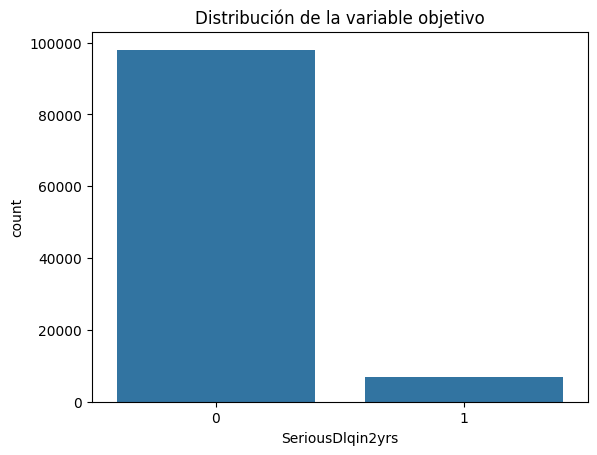

In [49]:
# Revisar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())


# Distribución de la variable objetivo
sns.countplot(x='SeriousDlqin2yrs', data=df)
plt.title('Distribución de la variable objetivo')
plt.show()


<Axes: >

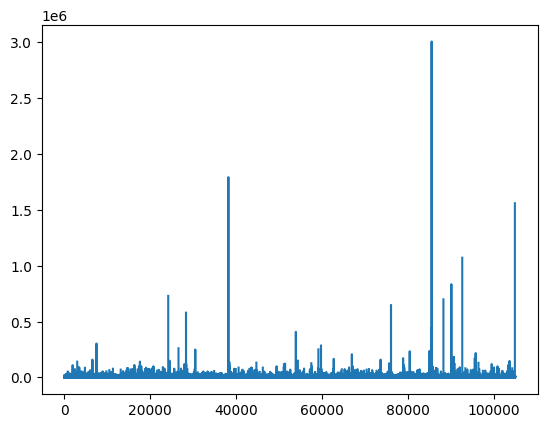

In [50]:
df["MonthlyIncome"].plot()

<Axes: >

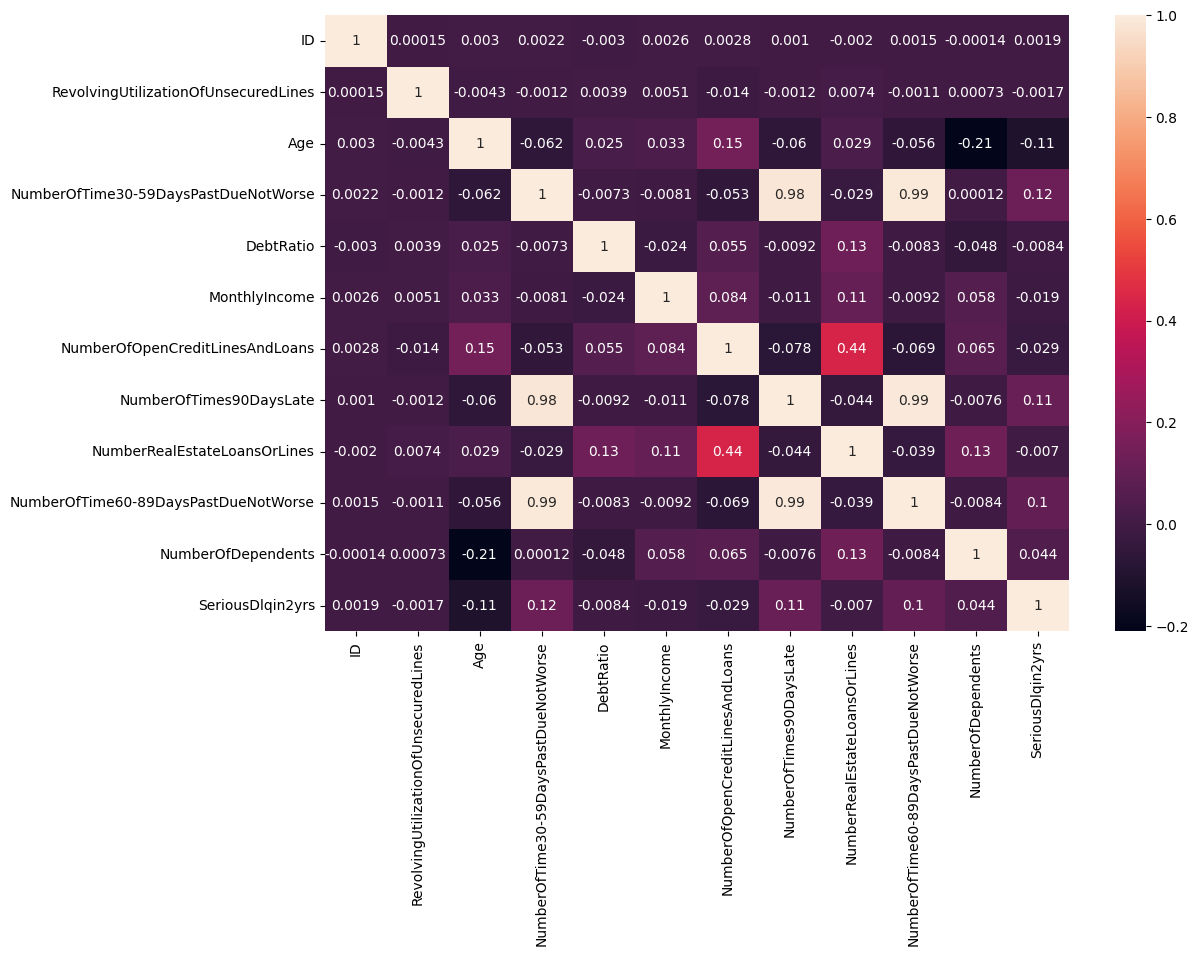

In [51]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)

## Data Engineering

In [52]:
# Crear columna de rango de edad
bins = [0, 25, 35, 45, 55, 65, 75, 85, 100, 150]
labels = ['<25','25-34','35-44','45-54','55-64','65-74','75-84','85-99','100+']
df['AgeRange'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calcular la mediana por rango de edad
median_income_by_age = df.groupby('AgeRange')['MonthlyIncome'].median()

# Función para imputar por mediana del grupo
def impute_income(row):
    if pd.isnull(row['MonthlyIncome']):
        return median_income_by_age[row['AgeRange']]
    else:
        return row['MonthlyIncome']

# Aplicar la función
df['MonthlyIncome'] = df.apply(impute_income, axis=1)


C:\Users\fer_r\AppData\Local\Temp\ipykernel_25992\3865890202.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_income_by_age = df.groupby('AgeRange')['MonthlyIncome'].median()


In [53]:
# Calcular la mediana de NumberOfDependents por rango de edad
median_dependents_by_age = df.groupby('AgeRange')['NumberOfDependents'].median()

# Función para imputar dependientes
def impute_dependents(row):
    if pd.isnull(row['NumberOfDependents']):
        return median_dependents_by_age[row['AgeRange']]
    else:
        return row['NumberOfDependents']

# Aplicar la función
df['NumberOfDependents'] = df.apply(impute_dependents, axis=1)


C:\Users\fer_r\AppData\Local\Temp\ipykernel_25992\3524683569.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_dependents_by_age = df.groupby('AgeRange')['NumberOfDependents'].median()


In [54]:
print("\nValores nulos después de todas las imputaciones:")
print(df.isnull().sum())


Valores nulos después de todas las imputaciones:
ID                                      0
RevolvingUtilizationOfUnsecuredLines    0
Age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
SeriousDlqin2yrs                        0
AgeRange                                0
dtype: int64


## Feature Engineering

In [55]:
df['DebtRatioLog'] = np.log1p(df['DebtRatio'])


In [56]:
df['IncomePerDependent'] = df['MonthlyIncome'] / (df['NumberOfDependents'] + 1)


In [57]:
df['AgeBucket'] = pd.cut(df['Age'], bins=[0,25,35,45,55,65,75,110], labels=False)


In [58]:
df['NumLatePayments'] = df[
    ['NumberOfTime30-59DaysPastDueNotWorse',
     'NumberOfTime60-89DaysPastDueNotWorse',
     'NumberOfTimes90DaysLate']
].sum(axis=1)


In [59]:
df['UtilizationPerAge'] = df['RevolvingUtilizationOfUnsecuredLines'] / df['Age']


In [60]:
df['HighDebtLowIncome'] = ((df['DebtRatio'] > df['DebtRatio'].median()) & 
                           (df['MonthlyIncome'] < df['MonthlyIncome'].median())).astype(int)


In [61]:
df['TotalAccounts'] = df['NumberOfOpenCreditLinesAndLoans'] + df['NumberRealEstateLoansOrLines'] + df['NumberOfDependents']


In [62]:
# -------------------------------
# 1️⃣ Imputar MonthlyIncome en test
# usando la mediana de TRAIN
monthly_income_median = df['MonthlyIncome'].median()
test['MonthlyIncome'].fillna(monthly_income_median, inplace=True)

# -------------------------------
# 2️⃣ Imputar NumberOfDependents en test
# usando la mediana de TRAIN
dependents_median = df['NumberOfDependents'].median()
test['NumberOfDependents'].fillna(dependents_median, inplace=True)

# -------------------------------
# 3️⃣ Crear AgeRange con los mismos bins
bins = [0,25,35,45,55,65,75,85,100,150]
labels = ['<25','25-34','35-44','45-54','55-64','65-74','75-84','85-99','100+']
test['AgeRange'] = pd.cut(test['Age'], bins=bins, labels=labels, right=False)

# -------------------------------
# 4️⃣ Imputar MonthlyIncome por AgeRange
median_income_by_age = df.groupby('AgeRange')['MonthlyIncome'].median()
test['MonthlyIncome'] = test.apply(
    lambda row: median_income_by_age[row['AgeRange']] if pd.isnull(row['MonthlyIncome']) else row['MonthlyIncome'],
    axis=1
)

# -------------------------------
# 5️⃣ Imputar NumberOfDependents por AgeRange
median_dependents_by_age = df.groupby('AgeRange')['NumberOfDependents'].median()
test['NumberOfDependents'] = test.apply(
    lambda row: median_dependents_by_age[row['AgeRange']] if pd.isnull(row['NumberOfDependents']) else row['NumberOfDependents'],
    axis=1
)

# -------------------------------
# 6️⃣ Crear DebtRatioLog
test['DebtRatioLog'] = np.log1p(test['DebtRatio'])

# -------------------------------
# 7️⃣ IncomePerDependent
test['IncomePerDependent'] = test['MonthlyIncome'] / (test['NumberOfDependents'] + 1)

# -------------------------------
# 8️⃣ AgeBucket (con mismos bins)
age_bins = [0,25,35,45,55,65,75,100]
test['AgeBucket'] = pd.cut(test['Age'], bins=age_bins, labels=False)

# -------------------------------
# 9️⃣ NumLatePayments
test['NumLatePayments'] = (
    test['NumberOfTime30-59DaysPastDueNotWorse'] +
    test['NumberOfTime60-89DaysPastDueNotWorse'] +
    test['NumberOfTimes90DaysLate']
)

# -------------------------------
# 🔟 UtilizationPerAge
test['UtilizationPerAge'] = test['RevolvingUtilizationOfUnsecuredLines'] / test['Age']

# -------------------------------
# 🔢 HighDebtLowIncome
debt_ratio_median = df['DebtRatio'].median()
income_median = df['MonthlyIncome'].median()
test['HighDebtLowIncome'] = (
    (test['DebtRatio'] > debt_ratio_median) & (test['MonthlyIncome'] < income_median)
).astype(int)

# -------------------------------
# 🔢 TotalAccounts
test['TotalAccounts'] = (
    test['NumberOfOpenCreditLinesAndLoans'] +
    test['NumberRealEstateLoansOrLines'] +
    test['NumberOfDependents']
)

# -------------------------------
# 〰️ Eliminar AgeRange si no lo necesitas
# test.drop('AgeRange', axis=1, inplace=True)

# -------------------------------
# ✅ Confirmar que test tiene las mismas columnas que X_train
print(test.columns)


C:\Users\fer_r\AppData\Local\Temp\ipykernel_25992\2531488774.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['MonthlyIncome'].fillna(monthly_income_median, inplace=True)
C:\Users\fer_r\AppData\Local\Temp\ipykernel_25992\2531488774.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

Index(['ID', 'RevolvingUtilizationOfUnsecuredLines', 'Age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'AgeRange', 'DebtRatioLog', 'IncomePerDependent',
       'AgeBucket', 'NumLatePayments', 'UtilizationPerAge',
       'HighDebtLowIncome', 'TotalAccounts'],
      dtype='object')


In [66]:
test.drop('AgeRange', axis=1, inplace=True)
df.drop('AgeRange', axis=1, inplace=True)

# Entrenar Modelos

## Regresión Logística

In [67]:
# Separar X e y
x = df.drop(['ID', 'SeriousDlqin2yrs'], axis=1)
y = df['SeriousDlqin2yrs']


In [68]:
from sklearn.preprocessing import StandardScaler
# Escalar variables
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [69]:
from sklearn.model_selection import train_test_split
# Split en train y validación
x_train, x_val, y_train, y_val = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# Entrenar modelo
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(x_train, y_train)

# Predecir
y_pred = model.predict(x_val)

# Evaluar
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.77      0.86     19603
           1       0.17      0.64      0.26      1397

    accuracy                           0.76     21000
   macro avg       0.57      0.71      0.56     21000
weighted avg       0.91      0.76      0.82     21000



## Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

params_rf = { 
    'n_estimators': [100, 300],                 
    'max_depth': [10, 20, 30],                  
    'min_samples_split': [2, 5],                      
    'min_samples_leaf': [1, 2],                        
    'max_features': ['sqrt', 'log2']                     
}

x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y)

# Modelo base
rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)

# GridSearch
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=params_rf,
    scoring='f1',  # ⚠️ podés usar 'recall' si querés priorizar recall
    cv=3,          # 3-fold cross validation
    n_jobs=-1,
    verbose=2
)

# Fit
grid_search.fit(x_train, y_train)
y_pred = model.predict(x_val)

# Mejor combinación
print("Mejores parámetros:", grid_search.best_params_)

# Evaluar en validación
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_val)

print(classification_report(y_val, y_pred))



Fitting 3 folds for each of 48 candidates, totalling 144 fits
Mejores parámetros: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     19603
           1       0.41      0.37      0.39      1397

    accuracy                           0.92     21000
   macro avg       0.68      0.67      0.67     21000
weighted avg       0.92      0.92      0.92     21000



c:\Users\fer_r\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
# X_test = test.drop(['ID'], axis=1)
# predictions = best_rf.predict(X_test)


ValueError: Input X contains infinity or a value too large for dtype('float32').